In [1]:
%matplotlib inline
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc3 as pm

In [2]:
data = pd.read_csv("/Users/nanwang/Desktop/Projects/RTModel/data/newdata/rt_tidy.csv")

,Unnamed: 0,X.1,language,user_id,trait,stim_id,order,rt,rating,country,...,ethnicity.x,lab,block,X,Race,Gender,Age,ethnicity.y,gender,log_rt
0,1,606711,SPA,9654,confident,BM-040,41,1903,3,CO,...,NaN,COL_004,2,51,B,M,26.952381,black,male,7.551187
1,2,331376,HU,5381,responsible,WF-015,33,799,7,HU,...,"magyar, kaukázusi",HUN_001,2,93,W,F,24.211111,white,female,6.683361
2,3,162777,ENG,2734,attractive,LF-208,14,1226,1,US,...,Hispanic,USA_038,2,63,L,F,24.642857,latinx,female,7.111512
3,4,614094,SPA,9753,caring,BF-008,67,4561,7,CO,...,ninguno,COL_004,1,35,B,F,24.574713,black,female,8.425297
4,5,732055,PT,11726,aggressive,BF-201,36,912,3,PT,...,Caucasiana,POR_001,2,40,B,F,27.400000,black,female,6.815640
5,6,353796,ENG,5692,attractive,BF-047,105,1446,1,AU,...,Caucasian,AUS_007,1,39,B,F,34.213483,black,female,7.276556
6,7,437062,ENG,6884,mean,WM-256,73,1991,1,CA,...,South Asian,CAN_018,1,120,W,M,30.961538,white,male,7.596392
7,8,88967,ENG,1541,old,BF-004,3,1437,4,US,...,White,USA_113,2,32,B,F,26.983696,black,female,7.270313
8,9,438455,ENG,6897,caring,LM-243,63,2546,6,CA,...,white,CAN_018,2,86,L,M,21.642857,latinx,male,7.842279
9,10,701944,ENG,11134,aggressive,LM-219,13,1629,2,US,...,white,USA_054,1,81,L,M,26.703704,latinx,male,7.395722


# Visualization

In [5]:
# show unique values for a certain column
print(f"Column 'col2' has unique values:")
print(data['trait'].unique())
print(data['rating'].unique())


Column 'col2' has unique values:
['confident' 'responsible' 'attractive' 'caring' 'aggressive' 'mean' 'old'
 'emostable' 'sociable' 'unhappy' 'dominant' 'trustworthy' 'weird'
 'intelligent']
[3 7 1 4 6 2 5 8 9]


In [13]:
datatest = data
# Use the astype() method to convert the numerical data to a factor using the 'category' data type
datatest['rating'] = datatest['rating'].astype('category')

In [22]:
# Define a list of participants to include in the filter
include = ['unhappy']
include2= ['BM-040']

# Use the `isin()` method to create a boolean mask and use boolean indexing to filter the DataFrame
grouptrait = datatest[datatest['trait'].isin(include)]
grouptrait2 = datatest[datatest['stim_id'].isin(include2)]

<AxesSubplot:xlabel='rating', ylabel='rt'>

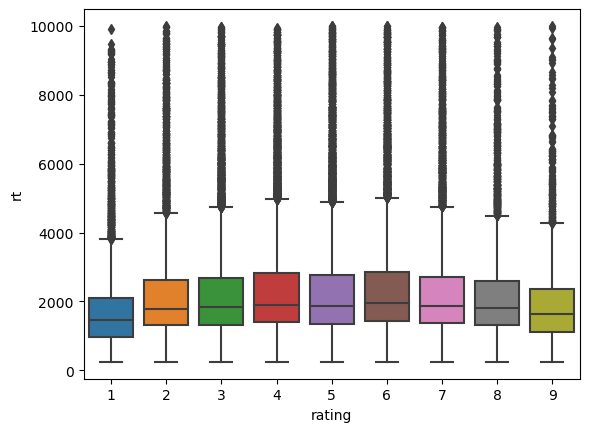

In [62]:
#import seaborn as sns
#grid = sns.FacetGrid(data, col='Race', col_wrap=3)
#grid.map(sns.histplot, 'rt')
sns.boxplot(x='rating', y='rt', data=datatest)



Some conclusions
1. extreme ratings, quicker speed
2. factors: face sex, face race, face features (determined by ratings) = reaction time 

face features = average of all positive ratings - average of all negative ratings 

stim_id
AF-203    AxesSubplot(0.125,0.11;0.775x0.77)
AF-204    AxesSubplot(0.125,0.11;0.775x0.77)
AF-205    AxesSubplot(0.125,0.11;0.775x0.77)
AF-209    AxesSubplot(0.125,0.11;0.775x0.77)
AF-211    AxesSubplot(0.125,0.11;0.775x0.77)
                         ...                
WM-237    AxesSubplot(0.125,0.11;0.775x0.77)
WM-242    AxesSubplot(0.125,0.11;0.775x0.77)
WM-243    AxesSubplot(0.125,0.11;0.775x0.77)
WM-244    AxesSubplot(0.125,0.11;0.775x0.77)
WM-256    AxesSubplot(0.125,0.11;0.775x0.77)
Name: rt, Length: 120, dtype: object

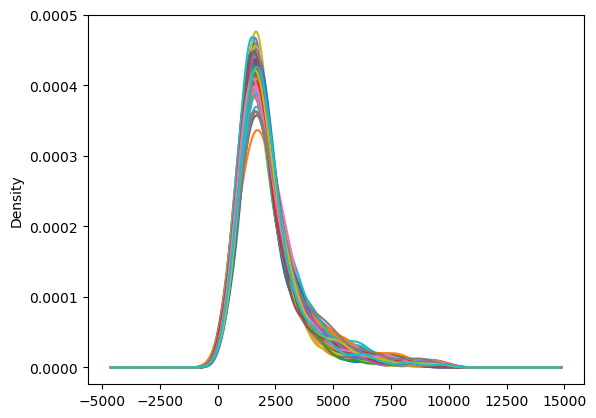

In [6]:
data.groupby(['stim_id']).rt.plot.density() 

# test hypothesis

# hypothesis 3

more extreme ratings, quicker speed

In [15]:
import pandas as pd
from scipy.stats import spearmanr

df3 = data

# add new columns to df3 

df3['rating_new'] = df3['rating'].replace({6: 4, 7: 3, 8: 2, 9: 1})
df3.head(20)

,Unnamed: 0,X.1,language,user_id,trait,stim_id,order,rt,rating,country,...,lab,block,X,Race,Gender,Age,ethnicity.y,gender,log_rt,rating_new
0,1,606711,SPA,9654,confident,BM-040,41,1903,3,CO,...,COL_004,2,51,B,M,26.952381,black,male,7.551187,3
1,2,331376,HU,5381,responsible,WF-015,33,799,7,HU,...,HUN_001,2,93,W,F,24.211111,white,female,6.683361,3
2,3,162777,ENG,2734,attractive,LF-208,14,1226,1,US,...,USA_038,2,63,L,F,24.642857,latinx,female,7.111512,1
3,4,614094,SPA,9753,caring,BF-008,67,4561,7,CO,...,COL_004,1,35,B,F,24.574713,black,female,8.425297,3
4,5,732055,PT,11726,aggressive,BF-201,36,912,3,PT,...,POR_001,2,40,B,F,27.400000,black,female,6.815640,3
5,6,353796,ENG,5692,attractive,BF-047,105,1446,1,AU,...,AUS_007,1,39,B,F,34.213483,black,female,7.276556,1
6,7,437062,ENG,6884,mean,WM-256,73,1991,1,CA,...,CAN_018,1,120,W,M,30.961538,white,male,7.596392,1
7,8,88967,ENG,1541,old,BF-004,3,1437,4,US,...,USA_113,2,32,B,F,26.983696,black,female,7.270313,4
8,9,438455,ENG,6897,caring,LM-243,63,2546,6,CA,...,CAN_018,2,86,L,M,21.642857,latinx,male,7.842279,4
9,10,701944,ENG,11134,aggressive,LM-219,13,1629,2,US,...,USA_054,1,81,L,M,26.703704,latinx,male,7.395722,2


In [41]:
import pandas as pd
from scipy.stats import f_oneway
#ra = ['1', '5']

#df3test = df3.loc[df['rating_new'].isin(ra)]

#rating_new = pd.factorize(df3.rating_new)

bins = [0, 1.5, 4.5, 6]

# convert the 'numbers' column to categorical variables using pd.cut()
df3['rating_nn'] = pd.cut(df3['rating_new'], bins=bins, labels=['high', 'medium', 'low'])

# Perform ANOVA
fstat, pval = f_oneway(df3.loc[df3['rating_nn'] == 'high', 'log_rt'], 
                        df3.loc[df3['rating_nn'] == 'medium', 'log_rt'], 
                        df3.loc[df3['rating_nn'] == 'low', 'log_rt'])

# Print results
print('ANOVA F-statistic:', fstat)
print('p-value:', pval)



ANOVA F-statistic: 655.3673247912199
p-value: 2.0325742672834114e-283


In [42]:
import pandas as pd
from scipy.stats import ttest_ind

# Subset the data for groups A and B
df_ab = df3.loc[df3['rating_nn'].isin(['medium', 'low'])]

# Perform t-test
tstat, pval = ttest_ind(df_ab.loc[df_ab['rating_nn'] == 'medium', 'log_rt'], 
                        df_ab.loc[df_ab['rating_nn'] == 'low', 'log_rt'])

# Print results
print('t-test statistic:', tstat)
print('p-value:', pval)

t-test statistic: 2.9654824956982764
p-value: 0.003022909196870932


In [ ]:
# spearman 
corr, pval = spearmanr(df3['rating_new'], df3['rt'])
print('Spearman correlation coefficient:', corr)
print('p-value:', pval)

<AxesSubplot:xlabel='rating_nn', ylabel='log_rt'>

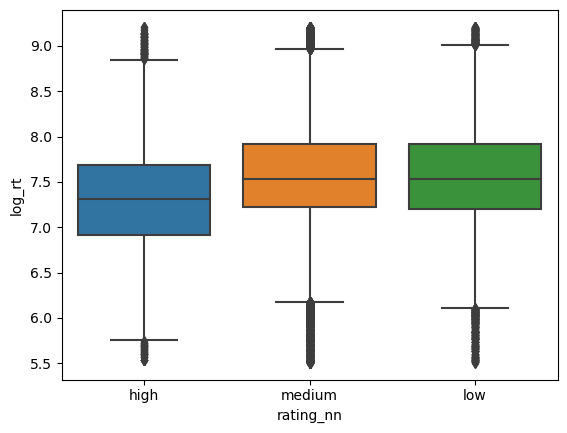

In [25]:
import seaborn as sns
#grid = sns.FacetGrid(data, col='Race', col_wrap=3)
#grid.map(sns.histplot, 'rt')
sns.boxplot(x='rating_nn', y='log_rt', data=df3)

## hypothesis 2

face sex, face race

In [63]:
df2 = data

include = ['unhappy']

trait = df2[df2['trait'].isin(include)]

<AxesSubplot:xlabel='Gender', ylabel='rt'>

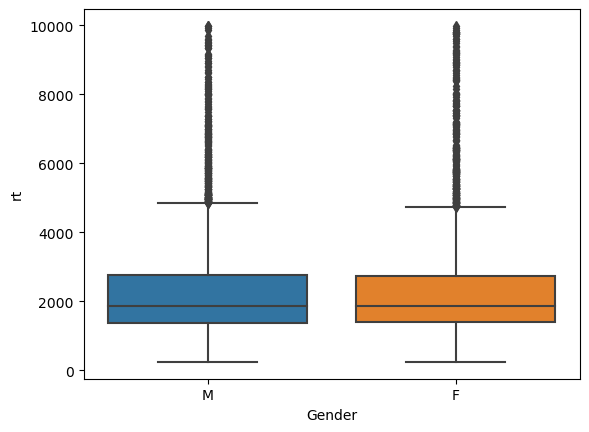

In [65]:
sns.boxplot(x='Gender', y='rt', data=trait)



## hypothesis 1

a complete list of variables: 
'confident' 'responsible' 'attractive' 'caring' 'emostable' 'sociable' 'trustworthy'  'intelligent' 
'dominant'

In [49]:
df = data

df['rating'] = pd.to_numeric(df['rating'])


neg = ['unhappy']
pos = ['sociable', 'caring']

# Calculate the average positive score and average negative score for each stimulus
pos_mean = df[df['trait'].isin(pos)].groupby('stim_id')['rating'].mean()
neg_mean = df[df['trait'].isin(neg)].groupby('stim_id')['rating'].mean()

# Subtract the average negative score from the average positive score for each stimulus to get the actual score
actual_score = pos_mean - neg_mean

# Merge the actual score back into the original DataFrame
df = pd.merge(df, actual_score, on='stim_id', suffixes=('','_mean'))
df['actual_score'] = df['rating_mean'] - df['rating']

# Drop the extra columns used for calculating actual score
#df.drop(['rating_mean'], axis=1, inplace=True)

# Print the updated DataFrame
df.head(10)

,Unnamed: 0,X.1,language,user_id,trait,stim_id,order,rt,rating,country,...,block,X,Race,Gender,Age,ethnicity.y,gender,log_rt,rating_mean,actual_score
0,1,606711,SPA,9654,confident,BM-040,41,1903,3,CO,...,2,51,B,M,26.952381,black,male,7.551187,1.084456,-1.915544
1,209,285313,ENG,4685,weird,BM-040,67,2695,6,US,...,1,51,B,M,26.952381,black,male,7.899153,1.084456,-4.915544
2,383,172951,ENG,2905,weird,BM-040,28,1470,5,CA,...,1,51,B,M,26.952381,black,male,7.293018,1.084456,-3.915544
3,411,115010,GER,1893,dominant,BM-040,80,3015,8,AT,...,1,51,B,M,26.952381,black,male,8.011355,1.084456,-6.915544
4,644,760354,ENG,12183,unhappy,BM-040,109,2572,4,US,...,2,51,B,M,26.952381,black,male,7.852439,1.084456,-2.915544
5,1109,487189,ENG,7727,caring,BM-040,52,2501,4,CA,...,1,51,B,M,26.952381,black,male,7.824446,1.084456,-2.915544
6,1217,207833,ENG,3392,confident,BM-040,58,1740,4,US,...,2,51,B,M,26.952381,black,male,7.461640,1.084456,-2.915544
7,1816,190760,ENG,3160,trustworthy,BM-040,83,1888,9,US,...,2,51,B,M,26.952381,black,male,7.543273,1.084456,-7.915544
8,1921,159147,NL,2657,unhappy,BM-040,75,1600,2,NL,...,2,51,B,M,26.952381,black,male,7.377759,1.084456,-0.915544
9,2105,163429,ENG,2744,caring,BM-040,37,1589,5,US,...,2,51,B,M,26.952381,black,male,7.370860,1.084456,-3.915544


In [53]:
df['rating_mean'] = (df['rating_mean'] + 3)*1000

# Get summary statistics for each column
summary = df.rating_mean.describe()

# Print the summary statistics
print(summary)

print(df['rating_mean'].unique())



count    95756.000000
mean      6431.343884
std       1168.820204
min       3237.460815
25%       5588.766789
50%       6435.483871
75%       7172.580645
max       9354.768322
Name: rating_mean, dtype: float64
[7084.45642408 7175.6440281  5283.86809269 6963.59397418 7749.07658212
 6408.69327501 6112.90322581 4803.125      5448.61859838 9354.76832242
 7298.61813279 9345.97309998 7177.71883289 7073.18789585 6966.86159844
 7270.0729927  6582.51231527 6007.84313725 5989.47368421 6403.62981851
 6435.48387097 6467.23163842 5934.7826087  6855.69852941 6676.41544807
 5281.76229508 5084.30769231 5798.0952381  7831.2390415  6532.04172876
 7137.39669421 6589.4909688  7040.6504065  6713.51351351 4801.04923325
 8612.44836918 7538.46153846 5903.91993328 5567.42963192 6478.67746289
 4699.12312751 5322.37288136 7397.9020979  6487.44731537 7172.58064516
 6035.60250391 4761.11111111 6091.95402299 6249.43181818 4242.85293251
 7157.22142516 6014.03286979 5737.88084372 5798.37398374 6113.8238573
 5753.7493

<AxesSubplot:xlabel='favalence', ylabel='rt'>

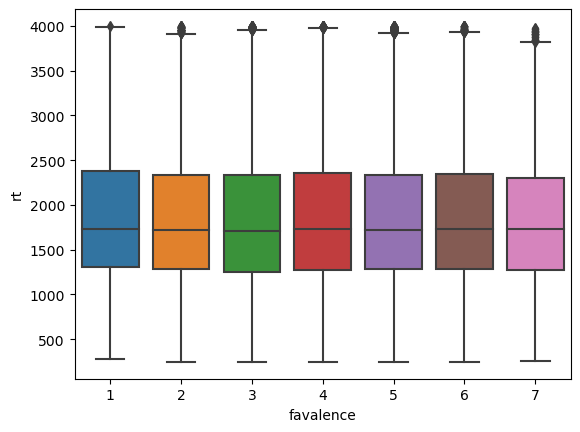

In [60]:
# define the bins
bins = [0, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# convert the 'numbers' column to categorical variables using pd.cut()
df['favalence'] = pd.cut(df['rating_mean'], bins=bins, labels=['1', '2', '3', '4','5','6','7'])

df_filtered = df.loc[df['rt'] < 4000]


sns.boxplot(x='favalence', y='rt', data=df_filtered)



# Hierarchical bayeisan model

In [5]:

lang_idxs, lang = pd.factorize(data.lang)

coords = {
    "lang":
     lang,
    "obs_id": np.arange(len(lang_idxs)),
}

In [6]:
from sklearn.preprocessing import LabelEncoder
#import pandas as pd
label_encoder = LabelEncoder()
data['smre'] = label_encoder.fit_transform(data['Sm'])

#Label encoding is a technique that assigns a unique numerical value to each category in a categorical variable. 
#This technique is useful when there is an inherent ordering to the categories. 
#You can use the sklearn library to perform label encoding using the LabelEncoder() function.




In [7]:
#Sm = pd.factorize(data.Sm)

In [8]:
with pm.Model(coords=coords) as model_ExGaussian3:
    m_alpha = pm.Normal("m_alpha", mu=0, sigma=10)  
    sig_alpha = pm.HalfNormal("sig_alpha", 10)
    m_beta = pm.Normal("m_beta", mu=0, sigma=10)  
    sig_beta = pm.HalfNormal("sig_beta", 10)
   
    # prior 
    alpha = pm.Normal('alpha', mu=m_alpha,sd=sig_alpha, dims="lang")
    beta = pm.Normal('beta',mu=m_beta,sd=sig_beta, dims="lang")
    
    # x
    x = pm.Data("x", data.smre, dims="obs_id")
    lang_idx = pm.Data("lang_idx", lang_idxs, dims="obs_id")
    mu = pm.Deterministic("mu",  alpha[lang_idxs]+ beta[lang_idxs]*x) 
    nu = pm.HalfNormal('nu', 100)
    sigma = pm.HalfNormal('sigma', 100)

    y_obs = pm.ExGaussian("y_obs", mu=mu,sigma=sigma,nu=nu, observed=data.rt, dims="obs_id")

In [9]:
#conda install -c conda-forge python-graphviz

Retrieving notices: ...working... done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/osx-64::conda==23.3.0=py39hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py39hecd8cb5_0
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::scrapy==2.6.2=py39hecd8cb5_0
  - defaults/osx-64::matplotlib==3.5.2=py39hecd8cb5_0
  - defaults/osx-64::hvplot==0.8.0=py39hecd8cb5_0
  - defaults/osx-64::plotly==5.9.0=py39hecd8cb5_0
  - defaults/osx-64::conda-build==3.22.0=py39hecd8cb5_0
  - defaults/osx-64::sphinx==5.0.2=py39hecd8cb5_0
  - def

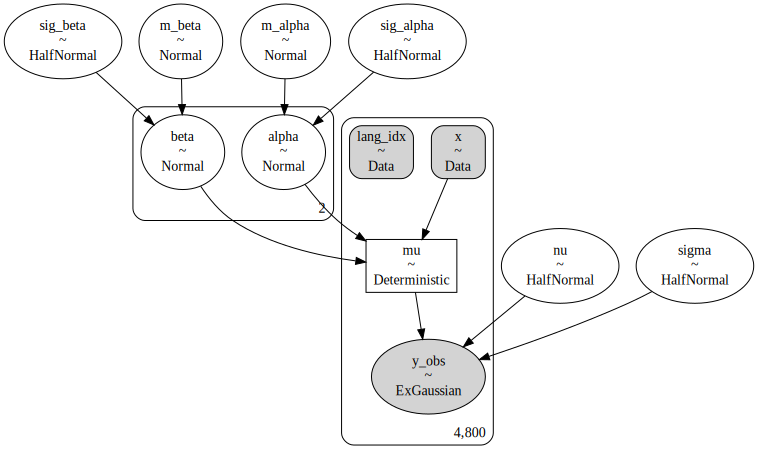

In [10]:

pm.model_to_graphviz(model_ExGaussian3)


In [11]:
# 检查先验
with model_ExGaussian3:
    prior_checks = pm.sample_prior_predictive(samples=1000)

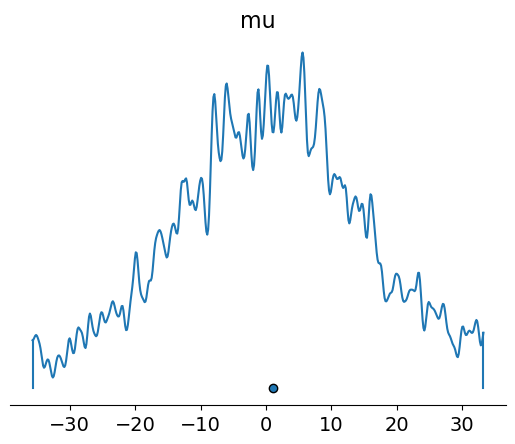

In [12]:
az.plot_density(
    {'mu':prior_checks['mu']}
    )
plt.show()

/Users/nanwang/opt/anaconda3/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


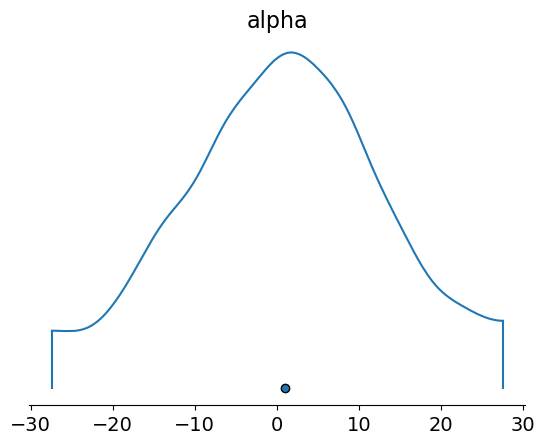

In [13]:
az.plot_density(
    {
        'alpha': prior_checks['alpha']
    }
    )
plt.show()

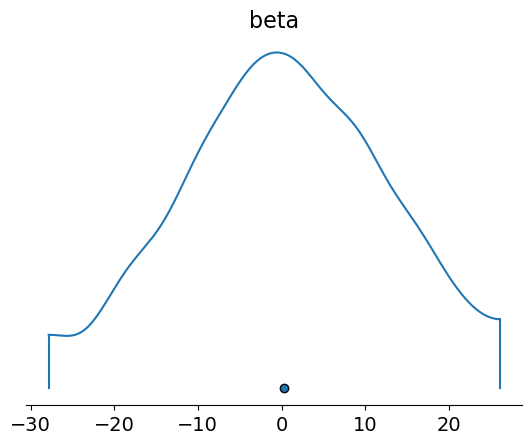

In [14]:
az.plot_density(
    {
        'beta': prior_checks['beta']
    }
    )
plt.show()

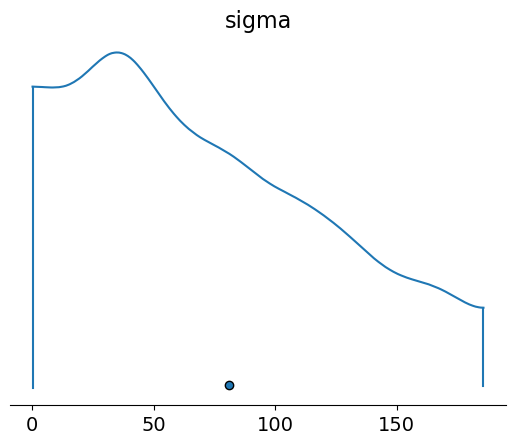

In [15]:
az.plot_density(
    {'sigma': prior_checks['sigma']
    }
    )
plt.show()

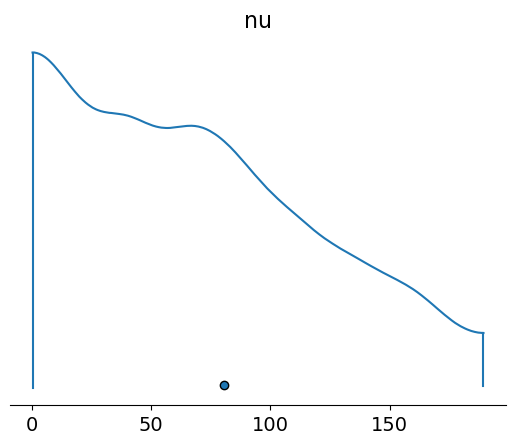

In [16]:
az.plot_density(
    {'nu': prior_checks['nu']
    }
    )
plt.show()

In [17]:
x = np.random.randint(2, size = 12) #生成50个假数据，取值为[0,1]

for a, b in zip(prior_checks["alpha"], prior_checks["beta"]):
    y1 = a + b * x 
    plt.plot(x, y1)

ValueError: operands could not be broadcast together with shapes (2,) (12,) 

In [43]:
#xcode-select --install


NameError: name 'xcode' is not defined

In [18]:
#MCMC sampling
with model_ExGaussian3:
    trace_ExGaussian3 = pm.sample(draws = 1000, tune= 500, target_accept=0.8, chains=2, cores= 2,return_inferencedata=True,init="adapt_diag")

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, nu, beta, alpha, sig_beta, m_beta, sig_alpha, m_alpha]


/Users/nanwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/nanwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 49 seconds.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9301263835709297, but should be close to 0.8. Try to increase the number of tuning steps.
There were 106 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


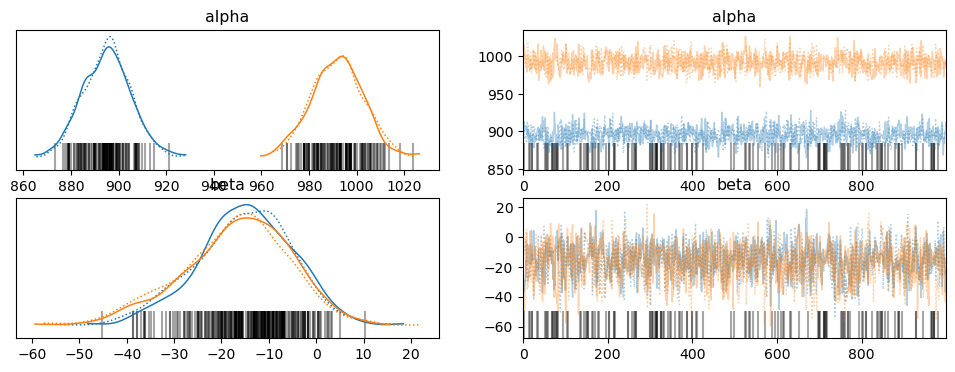

In [19]:
az.plot_trace(trace_ExGaussian3, var_names=['alpha','beta'])#分开呈现
plt.show()

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

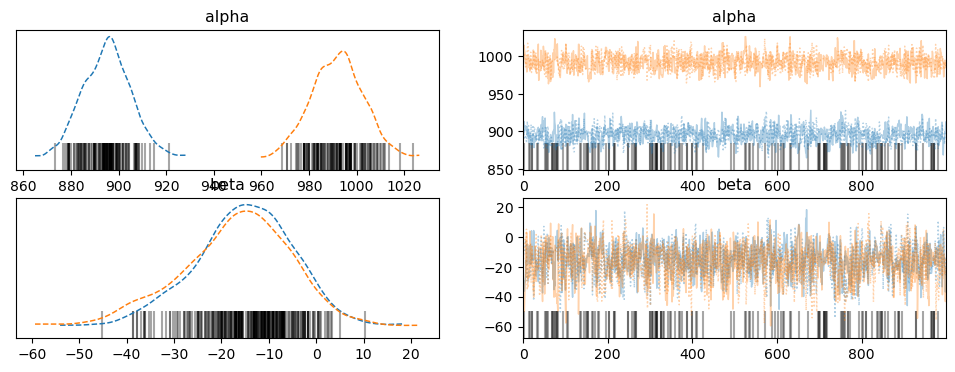

In [20]:
az.plot_trace(trace_ExGaussian3, var_names=['alpha','beta'], combined=True)

In [28]:
# Obtain posterior distribution for the effect of semantic relatedness
semantic_effect = trace_ExGaussian3['beta']

# Calculate mean and credible interval for the effect of semantic relatedness
#semantic_mean = np.mean(semantic_effect)
#semantic_ci = pm.stats.hpd(semantic_effect, credible_interval=0.95)
#print("Mean of the effect of semantic relatedness:", semantic_mean)
#print("95% credible interval of the effect of semantic relatedness:", semantic_ci)


KeyError: 'beta'

In [21]:
az.summary(trace_ExGaussian3, var_names=['alpha','beta'])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[yes],895.218,10.091,875.519,912.978,0.349,0.247,834.0,1037.0,1.0
alpha[no],992.009,10.768,971.523,1011.858,0.355,0.251,917.0,918.0,1.0
beta[yes],-15.164,10.231,-34.971,3.271,0.355,0.255,833.0,991.0,1.0
beta[no],-16.998,11.565,-39.944,2.828,0.457,0.323,662.0,1123.0,1.0


In [22]:
with model_ExGaussian3:
    #计算后验预测分布
    ppc_y = pm.sample_posterior_predictive(trace_ExGaussian3.posterior) 
#将ppc_y转化为InferenceData对象合并到trace中
az.concat(trace_ExGaussian3, az.from_pymc3(posterior_predictive=ppc_y), inplace=True)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/nanwang/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


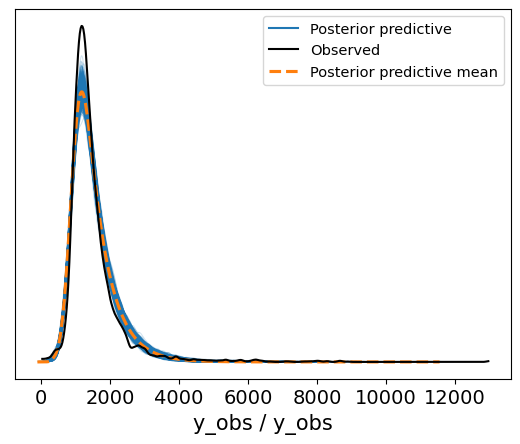

In [23]:
az.plot_ppc(trace_ExGaussian3)
plt.show()

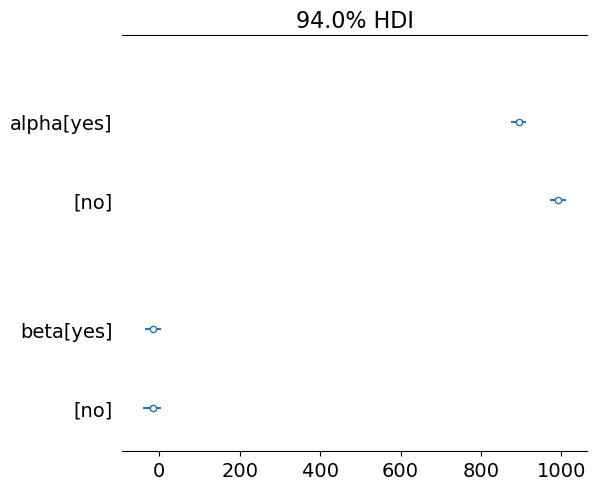

In [25]:
az.plot_forest(trace_ExGaussian3, var_names=['alpha', 'beta'], combined=True);
